In [14]:
import json

with open('../WORLDFLOODS/train/meta/01042016_Choctawhatchee_River_near_Bellwood_AL.json') as f:
  data = json.load(f)

data

{'source': 'glofimr',
 'satellite': 'Landsat-8',
 'satellite date': '2016-01-04T00:00:00Z',
 'shape': [10086, 8742],
 'pixels invalid S2': 3413143,
 'pixels clouds S2': 23711,
 'pixels water S2': 7084781,
 'pixels land S2': 77650177,
 'pixels flood water S2': 3414937,
 'pixels hydro water S2': 0,
 'pixels permanent water S2': 3669844,
 'method clouds': 's2cloudless',
 'bounds': [-86.43742377396336,
  30.3493123793928,
  -85.65211655258608,
  31.255353174955747],
 's2metadata': [{'date_string': '2016-01-11 16:37',
   'system:time_start': 1452530233424,
   'area_rel': 100}]}

In [2]:
data['satellite']

'Landsat-8'

In [6]:
import glob
files=glob.glob("../WORLDFLOODS/val/meta/*")

In [4]:
meta_keys=set()
for file in files:
    with open(file) as f:
        data = json.load(f)
    for key in data.keys():
        meta_keys.add(key)
#ALL KEYS OF THE METADATA (TRAIN, VAL, TEST)
meta_keys

{'bounds',
 'method clouds',
 'pixels clouds S2',
 'pixels flood water S2',
 'pixels hydro water S2',
 'pixels invalid S2',
 'pixels land S2',
 'pixels permanent water S2',
 'pixels water S2',
 's2metadata',
 'satellite',
 'satellite date',
 'shape',
 'source'}

In [9]:
satellites=set()
for file in files:
    with open(file) as f:
        data = json.load(f)
    satellites.add(data['satellite'])
    
# ALL SATELLITES THAT ARE IN THE METADATA
satellites

# TRAIN: {'COSMO-SkyMed',
# 'GeoEye-1',
# 'Landsat-8',
# 'PlanetScope',
# 'Pleiades-1A-1B',
# 'RADARSAT-2',
# 'SPOT-6-7',
# 'Sentinel-1',
# 'TERRASAR-X',
# 'WorldView-1',
# 'WorldView-2',
# 'WorldView-3',
# 'earth observing 1',
# 'spot 6'}

# VAL: {'COSMO-SkyMed', 'RADARSAT-2', 'SPOT-6-7', 'Sentinel-1'}

# TEST: {'Sentinel-1', 'Sentinel-2'}

set()

In [41]:
sources=set(())
for file in files:
    with open(file) as f:
        data = json.load(f)
    sources.add(data['source'])
    
# ALL SOURCES OF THE METADATA
sources

# TRAIN:
# GLOFIMR (Global Flood Inundation Map Repository)
# CopernicusEMS (Copernicus Emergency Managament System)
# Unosat (United Nationa Satellite System)

# VAL:
# CopernicusEMS (Copernicus Emergency Managament System)
# Unosat (United Nationa Satellite System)

# TEST:
# CopernicusEMS (Copernicus Emergency Managament System)

{'CopernicusEMS'}

In [2]:
import geopandas

<AxesSubplot:>

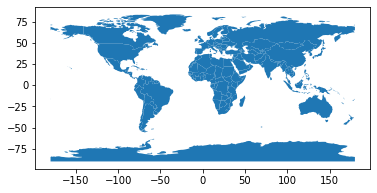

In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()

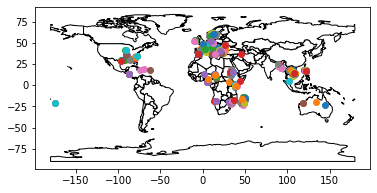

In [32]:
# TO SEE ALL THE LOCATIONS IN TRAIN/VAL/TEST

import glob
#files=glob.glob("../WORLDFLOODS/test/meta/*")
files=glob.glob("../WORLDFLOODS/train/meta/*")
#files=glob.glob("../WORLDFLOODS/val/meta/*")
coords=[]
for file in files:
    with open(file) as f:
        data = json.load(f)
    #print((data['bounds'][0],data['bounds'][1]))
    coords.append((data['bounds'][0],data['bounds'][1]))
coords

base = world.plot(color='white', edgecolor='black')

#cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

#cities.plot(ax=base, marker='o', color='red', markersize=5);
for coord in coords:
    base.scatter(coord[0], coord[1])
    